In [26]:
import numpy as np
import matplotlib.pyplot as plt
import copy

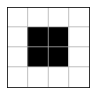

In [85]:
size = 4

init = np.zeros(shape = (size,size))

init[1:size-1, 1:size-1] = 1

init = init.astype(int)

fig = plt.figure(figsize=[5,5])

ax = plt.subplot(3,3,1)

plt.pcolor(init, cmap = 'Greys')

plt.grid(snap = 0)

plt.xticks([1,2,3])
plt.yticks([1,2,3])

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show();

In [86]:
init[1,1]

1

## define number of neighbours

In [88]:
Nn = np.zeros(shape = (size,size))

i = j = 2

Nn = np.sum( [
    init[i-1, j-1], 
    init[i, j-1], 
    init[i+1, j-1],
    init[i-1, j],
    init[i+1, j],
    init[i-1, j+1],
    init[i, j+1],
    init[i+1, j+1]                    
])

In [89]:
Nn

3